# Spectrum Generation

We use the data to generate spectra for the incidence of particles on the detector

In [1]:
#Include modules
from accelerate import *
from tqdm.notebook import tqdm

%matplotlib widget

In [2]:
# Read the files

# Parameters
run                     = 'run0'

# Find the files
foldername  = f'./data/{run}'
filenames   = [os.path.join(foldername,filename) for filename in os.listdir(foldername)]

# Print the number of files found
print(f'Found {len(filenames)} data files in {foldername}')

Found 11 data files in ./data/run0


Cm244:   0%|          | 0/1 [00:00<?, ?it/s]

loadFile:   0%|          | 0/11 [00:00<?, ?it/s]

[Empty DataFrame
Columns: [EventID, TrackID, Particle, InitialEnergy, DepositedEnergy, XPosition, YPosition, ZPosition, LocalTime, Volume]
Index: [],       EventID  TrackID Particle  InitialEnergy  DepositedEnergy  XPosition  \
0        8001       13       e-   5.113180e+02         0.319178    135.675   
1        8023        5    alpha   3.732550e+06      5168.070000    108.172   
2        8038        5    alpha   3.732550e+06      5168.070000    206.920   
3        8039       11       e-   5.112500e+02         0.251232    113.853   
4        8045     2761       e-   5.345260e+02        23.526700    166.885   
...       ...      ...      ...            ...              ...        ...   
1224   182680      333       e-   5.110990e+02         0.100318    200.710   
1225   182685     2828       e-   5.139100e+02         2.910740    111.254   
1226   182696       71       e-   5.116290e+02         0.630040    208.308   
1227   182699        3    alpha   3.733180e+06      5804.880000    114

getEnergy:   0%|          | 0/11 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/11 [00:00<?, ?it/s]

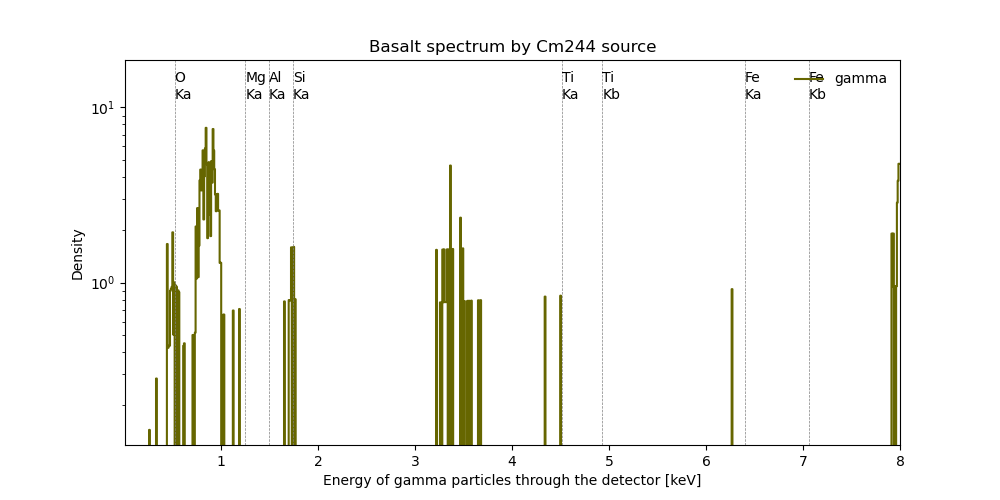

In [3]:
RUN_STRUCTURE = {
    'nt' : 'Cm244',
    # 'run1' : 'Fe55',
    # 'run2' : 'Cd109',
    # 'run3' : 'Co60',
    # 'run4' : 'Am241'
}

MATERIAL = {
    'name' : 'Basalt',
    'peaks' : {
        'Fe\nKa' : 6.40,
        'Fe\nKb' : 7.06,
        'Ti\nKa' : 4.51,
        'Ti\nKb' : 4.93,
        'Si\nKa' : 1.74,
        'Al\nKa' : 1.49,
        'Mg\nKa' : 1.25,
        'O\nKa'  : 0.52,
    }
}

STD                 = 0.04
particleEnergyList  = {}
PARTICLES           = ['gamma']
EFFICIENCY          = pd.read_csv('./data/SDD_Efficiency/C1.csv', names=['Energy','Efficiency'])

# For all the simulation runs
pbar = tqdm(RUN_STRUCTURE,desc=list(RUN_STRUCTURE.values())[0])
for i,run in enumerate(pbar):
    # Collect their output files
    files = loadFiles([filename for filename in filenames if run in filename])
    print(files)
    

    # Extract the energy for each particle
    particleEnergyList[run] = getParticleEnergiesSmeared(files,
        smearfunc   = smear_gaussian,
        size        = STD,
        groupBy     = 'TrackID',
        columnName  = 'InitialEnergy'
        )
    
    particles = None
    try:
        particles = pd.concat([particleEnergyList[run][p] for p in PARTICLES])
    except:
        pass
    
    # Plot the spectrum
    if particles is not None : plotParticleHistogram(particles,
        source          = RUN_STRUCTURE[run],
        PARTICLE        = ' and '.join(PARTICLES),
        MATERIAL        = MATERIAL,
        SHOW_MATERIAL   = True,
        LIMS            = (0,8),
        MAX_PEAKS       = 0,
        NBINS           = 1000,
        SAVE            = True,
        yscale          = 'log',
        efficiency      = EFFICIENCY)

    # Change the description of the progress bar to show the material processed
    try:
        pbar.set_description(list(RUN_STRUCTURE.values())[i+1])
    except:
        pass

In [4]:
print("The unique particles are:")
for run in particleEnergyList:
    print(f'{run}:',[[particle, len(particleEnergyList[run][particle])] for particle in particleEnergyList[run]])

The unique particles are:
nt: [['e-', 8069], ['alpha', 4393], ['gamma', 536]]
